# DATA SCIENCE PREDICTIVE MODEL

## TASK 1: Predicting using supervised ML

### Author - AKHILESH

### Dataset used: Student Scores
  
    


<b> Problem statement(s):<b>
  * Predict the percentage of a student based on the no. of study hours.
  * What will be predicted score if a student studies for 7.00hrs/day?

<b> Import necessary libraries <b>

In [59]:
import warnings 
warnings.filterwarnings("ignore")

In [60]:
import pandas as pd 

In [61]:
import sklearn.model_selection as sk

In [62]:
import seaborn as sns

In [63]:
import numpy as np

In [64]:
import matplotlib.pyplot as plt


<b> Read the csv data set as  pandas dataframe<b>

In [65]:
data = pd.read_csv("Book1.csv")

In [66]:
print(data.head(10)) # default value for head is 5

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
5    1.5      20
6    9.2      88
7    5.5      60
8    8.3      81
9    2.7      25


In [67]:
print(data.tail()) # default value for tail is also 5

    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [68]:
data.shape # view the shape i.e., no. of rows,columns

(25, 2)

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [70]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<b> Visualize the data<b>

<Axes: xlabel='Hours', ylabel='Scores'>

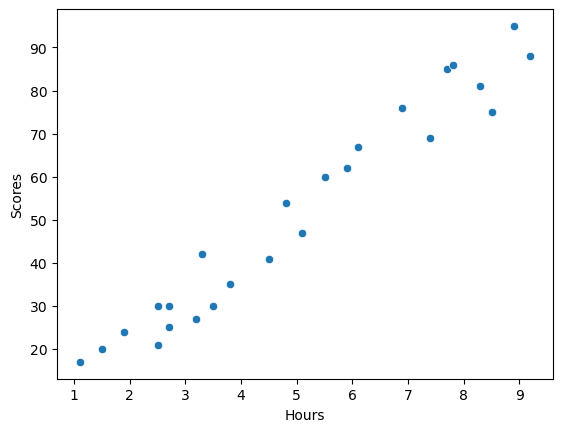

In [71]:
sns.scatterplot(x=data["Hours"], y=data["Scores"]) # plot the data 

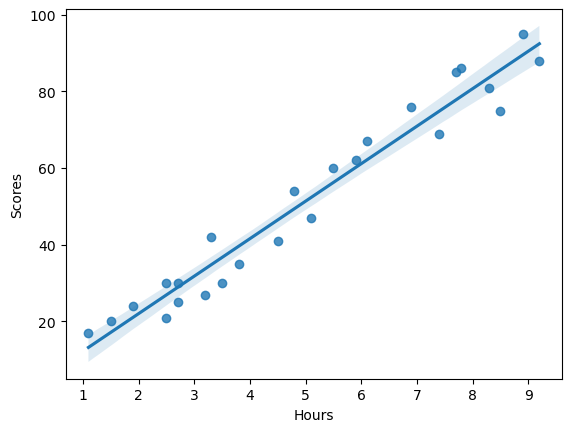

In [72]:
sns.regplot(x=data["Hours"], y=data["Scores"]); # regression plot gives a better and clear visualizaion of such data

<b> Seperate feature(s) and target<b>

In [73]:
X = data[['Hours']]
y = data['Scores']

In [98]:
#train_x,val_x,train_y,val_y=sk.train_test_split(X,y,random_state=0)

y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

<b>Train-test split<b>

In [75]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X,y,random_state=0)

<b>Model Building<b>

In [76]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [97]:
val_y

5     20
2     27
19    69
16    30
11    62
22    35
17    24
Name: Scores, dtype: int64

In [77]:
regressor.fit(train_X,train_y) # train the model

LinearRegression()

In [78]:
pred_y=regressor.predict(val_X) #prediction

In [79]:
pd.DataFrame({'Actual':val_y,'Predicted':pred_y}) # view actual and predicted on test set side by side

,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


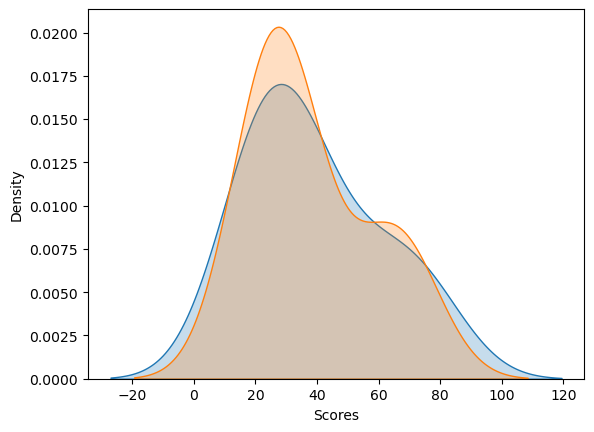

In [80]:
# Actual vs Prediced distribution plot
sns.kdeplot(pred_y,label="Predicted", shade=True);
sns.kdeplot(data=val_y,label="Actual",shade=True);

In [81]:
print("Train Accuracy: ", regressor.score(train_X,train_y),"\nTest accuracy:", regressor.score(val_X,val_y))

Train Accuracy:  0.9484509249326872 
Test accuracy: 0.9367661043365056


In [82]:
#Predict percent for custom input value for hours 
# Q. what will be predicted score if a student studies for 9.25hrs/day?
h=[[7]]
s=regressor.predict(h)
print("A student who studies",h[0][0], "hours is estimated to score",s[0])

A student who studies 7 hours is estimated to score 71.52395262956833


In [83]:
import pickle 

In [84]:
# with open('model_pkl', 'wb') as files:
#     pickle.dump(regressor, files) # to store the trained model
# 2nd way
pickle.dump(regressor,open('model.pkl','wb'))

In [85]:
# # to load the model
# with open('model_pkl' , 'rb') as f:  # to load the model again 
#     lr = pickle.load(f)
# 2nd way 
load_model=pickle.load(open('model.pkl','rb'))

In [99]:
load_model.predict([[9.2]])

array([93.39564498])